# Etude sur l'initialisation des paramètres

In [1]:
cd ../src

c:\Users\fredl\Documents\Cours\M1 Androide\S2\ML\Projet\src


C:\Users\fredl\AppData\Roaming\Python\Python313\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np

from activation_func import *
from loss import *
from mltools import *
from module import *
from optimizers import *

In [5]:
def train_binary_classification_seq_multiple_runs(init, nb_runs=5):
    predictions = []
    final_losses = []
    all_losses = []
    num_epochs = 500
    learning_rate = 1e-4
    loss_fn = MSELoss()
    np.random.seed()
    networks = []
    for run in range(nb_runs):
        print(f"Run {run + 1}/{nb_runs}")
        X_train, y_train = gen_arti(nbex=1000, data_type=1, epsilon=0.0)
        X_test, y_test = gen_arti(nbex=1000, data_type=1, epsilon=0.0)
        input_dim = X_train.shape[1]
        output_dim = 1

        network = Sequential(
            Linear(input_dim, 64, init),
            TanH(),
            Linear(64, output_dim, init),
            Sigmoid()
        )
        networks.append(network)

        def predict(X):
            Y_pred = network.forward(X)
            return np.where(Y_pred >= 0.5, 1, 0)

        y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
        y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))

        optimizer = Optim(networks[run], loss_fn, learning_rate)
        losses = optimizer.SGD(X_train, y_train, batch_size=64, num_iterations=num_epochs)

        predictions.append([predict(X_train), predict(X_test)])
        all_losses.append(losses)
        final_losses.append(losses[-1])
        print("Final loss:", final_losses[-1])
        plot_classification(X_train, y_train, X_test, y_test, predict, num_epochs, all_losses[-1], with_batch=True)

    # best_run_idx = np.argmin(final_losses)
    # worst_run_idx = np.argmax(final_losses)

    # print("Best run:")
    # print("Final loss:", final_losses[best_run_idx])
    # plot_classification(X_train, y_train, X_test, y_test, predictions[best_run_idx], num_epochs, all_losses[best_run_idx], with_batch=True, network=networks[best_run_idx])

    # print("Worst run:")
    # print("Final loss:", final_losses[worst_run_idx])
    # plot_classification(X_train, y_train, X_test, y_test, predictions[worst_run_idx], num_epochs, all_losses[worst_run_idx], with_batch=True, network=networks[worst_run_idx])

    plot_iqm(all_losses)

random

Run 1/5


100%|██████████| 500/500 [00:02<00:00, 173.77it/s]


Final loss: 31.437684404370877
Train accuracy : 0.493
Test accuracy : 0.49


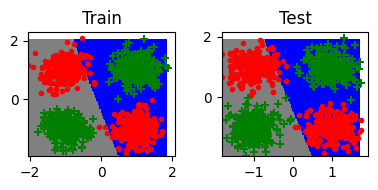

Run 2/5


100%|██████████| 500/500 [00:03<00:00, 165.13it/s]


Final loss: 17.330041895170545
Train accuracy : 0.715
Test accuracy : 0.72


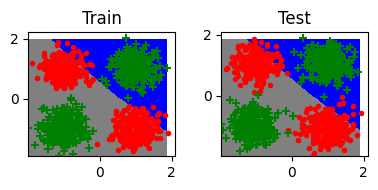

Run 3/5


100%|██████████| 500/500 [00:03<00:00, 166.06it/s]


Final loss: 31.902899731520783
Train accuracy : 0.485
Test accuracy : 0.479


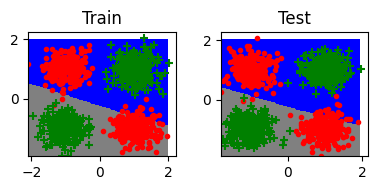

Run 4/5


100%|██████████| 500/500 [00:03<00:00, 158.52it/s]


Final loss: 27.363268830032716
Train accuracy : 0.545
Test accuracy : 0.551


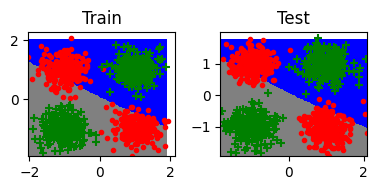

Run 5/5


100%|██████████| 500/500 [00:03<00:00, 165.88it/s]


Final loss: 17.353439592411654
Train accuracy : 0.712
Test accuracy : 0.714


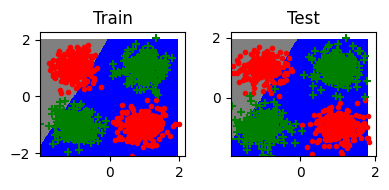

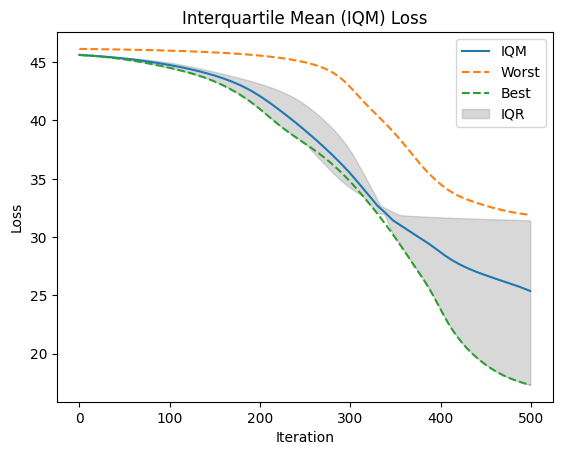

In [6]:
train_binary_classification_seq_multiple_runs("random")

random.randn

Run 1/5


100%|██████████| 500/500 [00:02<00:00, 173.05it/s]


Final loss: 0.31494059835053045
Train accuracy : 0.998
Test accuracy : 0.998


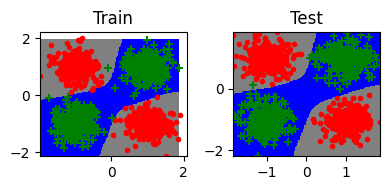

Run 2/5


100%|██████████| 500/500 [00:03<00:00, 159.99it/s]


Final loss: 0.3048173394895468
Train accuracy : 0.998
Test accuracy : 0.996


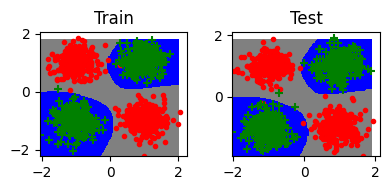

Run 3/5


100%|██████████| 500/500 [00:03<00:00, 166.24it/s]


Final loss: 15.668406039875013
Train accuracy : 0.75
Test accuracy : 0.747


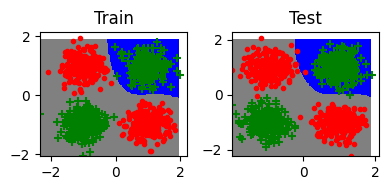

Run 4/5


100%|██████████| 500/500 [00:03<00:00, 151.04it/s]


Final loss: 15.717724211290633
Train accuracy : 0.749
Test accuracy : 0.749


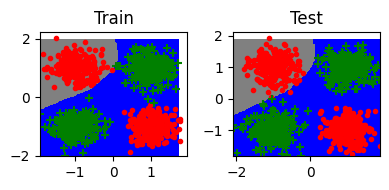

Run 5/5


100%|██████████| 500/500 [00:03<00:00, 156.27it/s]


Final loss: 15.776470204261011
Train accuracy : 0.75
Test accuracy : 0.75


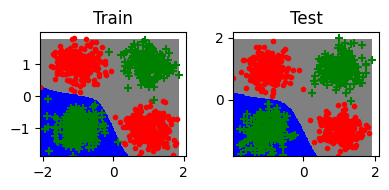

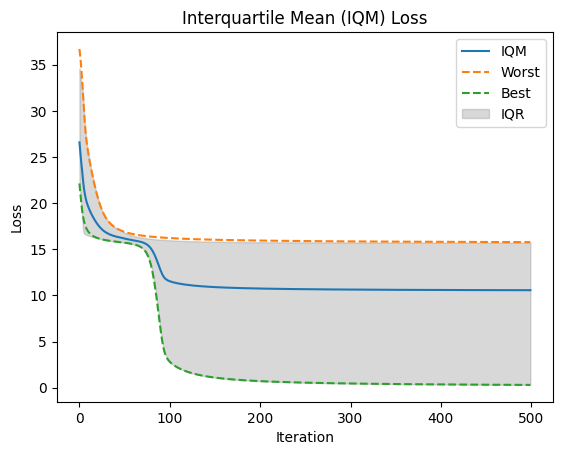

In [7]:
train_binary_classification_seq_multiple_runs("normal")

he_normal

Run 1/5


100%|██████████| 500/500 [00:02<00:00, 172.21it/s]


Final loss: 0.6607324850312688
Train accuracy : 0.998
Test accuracy : 1.0


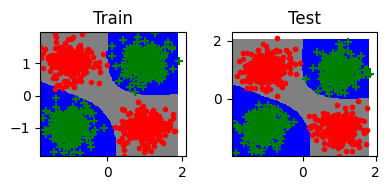

Run 2/5


100%|██████████| 500/500 [00:03<00:00, 145.66it/s]


Final loss: 0.747117425572377
Train accuracy : 0.998
Test accuracy : 0.996


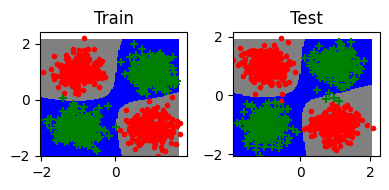

Run 3/5


100%|██████████| 500/500 [00:03<00:00, 160.15it/s]


Final loss: 0.7333979997492182
Train accuracy : 0.996
Test accuracy : 0.996


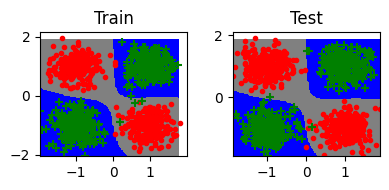

Run 4/5


100%|██████████| 500/500 [00:02<00:00, 169.74it/s]


Final loss: 0.576151897062961
Train accuracy : 0.999
Test accuracy : 0.996


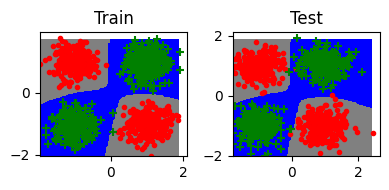

Run 5/5


100%|██████████| 500/500 [00:03<00:00, 156.85it/s]


Final loss: 0.5411356329448282
Train accuracy : 1.0
Test accuracy : 0.996


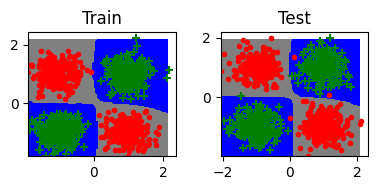

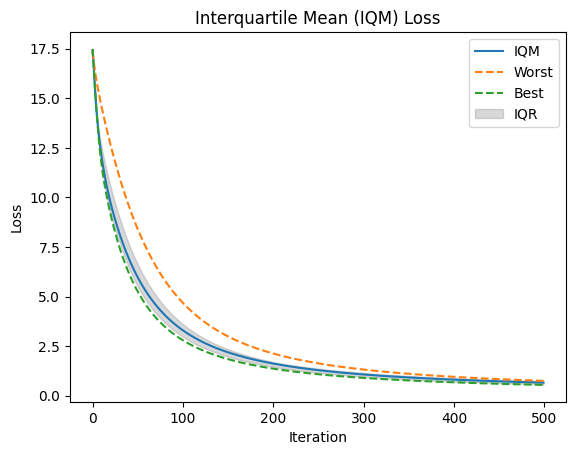

In [8]:
train_binary_classification_seq_multiple_runs("he_normal")

xavier_normal

Run 1/5


100%|██████████| 500/500 [00:03<00:00, 147.63it/s]


Final loss: 4.466315765374228
Train accuracy : 0.999
Test accuracy : 0.995


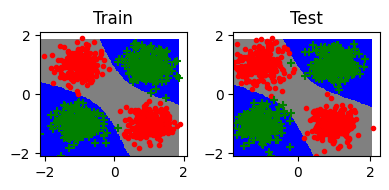

Run 2/5


100%|██████████| 500/500 [00:03<00:00, 161.20it/s]


Final loss: 3.645856926996665
Train accuracy : 0.991
Test accuracy : 0.993


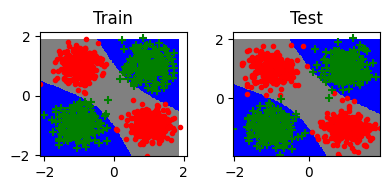

Run 3/5


100%|██████████| 500/500 [00:03<00:00, 159.71it/s]


Final loss: 6.151357833460388
Train accuracy : 0.998
Test accuracy : 0.994


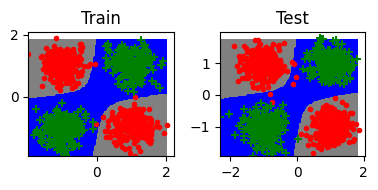

Run 4/5


100%|██████████| 500/500 [00:02<00:00, 167.92it/s]


Final loss: 5.9986799649741975
Train accuracy : 0.991
Test accuracy : 0.992


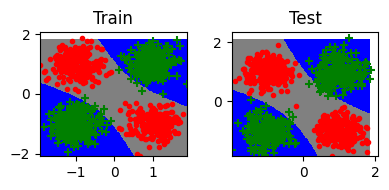

Run 5/5


100%|██████████| 500/500 [00:03<00:00, 160.54it/s]


Final loss: 5.639557782810237
Train accuracy : 1.0
Test accuracy : 0.999


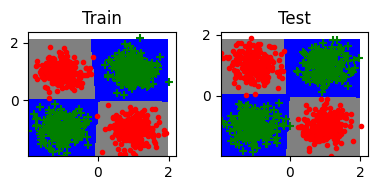

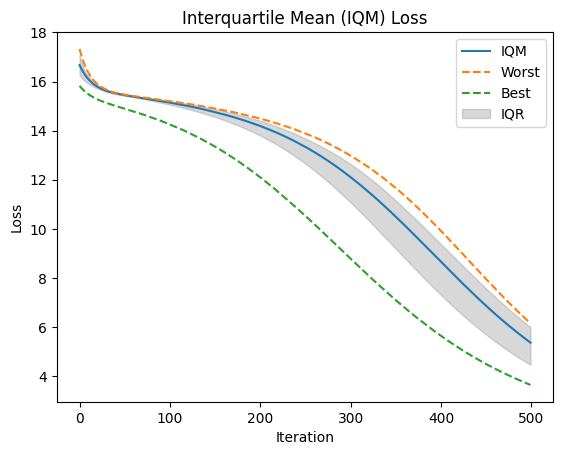

In [9]:
train_binary_classification_seq_multiple_runs("xavier_normal")

uniform

Run 1/5


100%|██████████| 500/500 [00:03<00:00, 152.39it/s]


Final loss: 3.3470735786533465
Train accuracy : 0.997
Test accuracy : 1.0


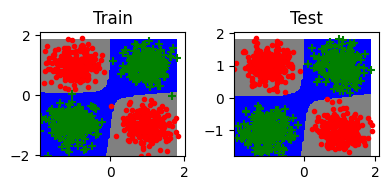

Run 2/5


100%|██████████| 500/500 [00:03<00:00, 154.38it/s]


Final loss: 4.9276707044797625
Train accuracy : 0.999
Test accuracy : 0.997


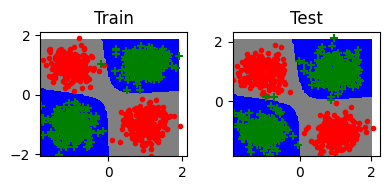

Run 3/5


100%|██████████| 500/500 [00:03<00:00, 156.18it/s]


Final loss: 5.76012279474863
Train accuracy : 1.0
Test accuracy : 0.996


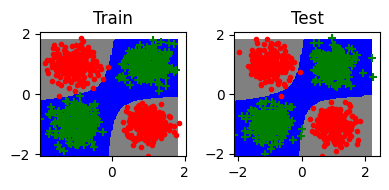

Run 4/5


100%|██████████| 500/500 [00:02<00:00, 167.01it/s]


Final loss: 3.2278638220175617
Train accuracy : 0.999
Test accuracy : 0.999


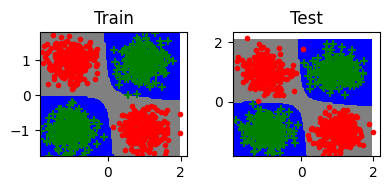

Run 5/5


100%|██████████| 500/500 [00:02<00:00, 173.78it/s]


Final loss: 7.165888459901143
Train accuracy : 0.997
Test accuracy : 0.996


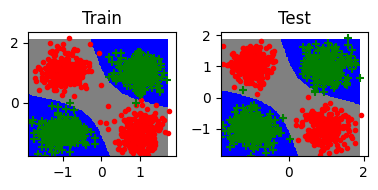

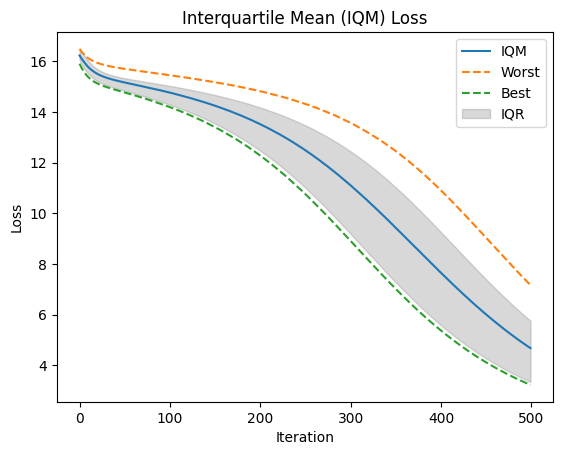

In [10]:
train_binary_classification_seq_multiple_runs("uniform")

he_uniform

Run 1/5


100%|██████████| 500/500 [00:03<00:00, 152.53it/s]


Final loss: 5.437417439821839
Train accuracy : 0.996
Test accuracy : 0.998


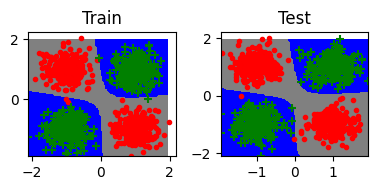

Run 2/5


100%|██████████| 500/500 [00:03<00:00, 162.05it/s]


Final loss: 4.328227743502478
Train accuracy : 1.0
Test accuracy : 0.998


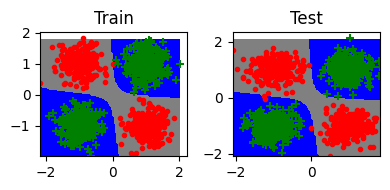

Run 3/5


100%|██████████| 500/500 [00:03<00:00, 154.77it/s]


Final loss: 4.952847254879725
Train accuracy : 0.993
Test accuracy : 1.0


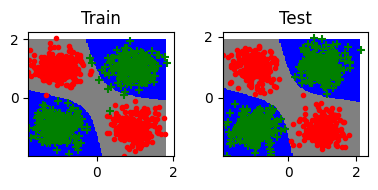

Run 4/5


100%|██████████| 500/500 [00:03<00:00, 160.36it/s]


Final loss: 4.265214122910556
Train accuracy : 0.998
Test accuracy : 0.994


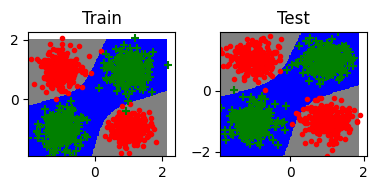

Run 5/5


100%|██████████| 500/500 [00:02<00:00, 168.83it/s]


Final loss: 4.425132998960189
Train accuracy : 0.996
Test accuracy : 0.999


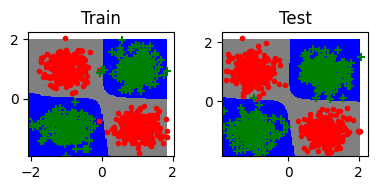

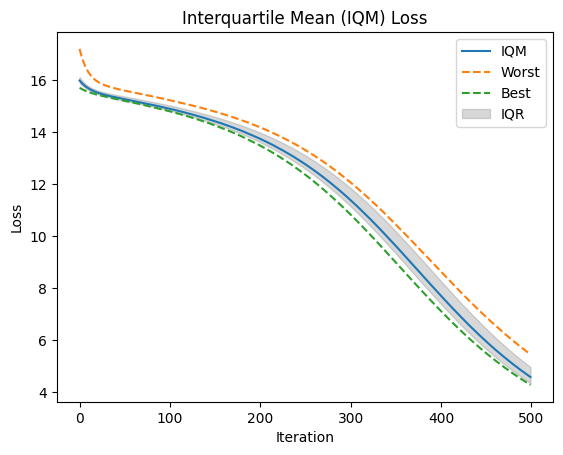

In [11]:
train_binary_classification_seq_multiple_runs("he_uniform")

xavier_uniform

Run 1/5


100%|██████████| 500/500 [00:03<00:00, 154.35it/s]


Final loss: 5.586112847616428
Train accuracy : 0.997
Test accuracy : 0.997


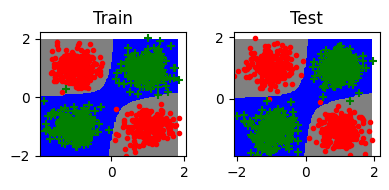

Run 2/5


100%|██████████| 500/500 [00:02<00:00, 169.11it/s]


Final loss: 4.166507922057695
Train accuracy : 0.994
Test accuracy : 0.996


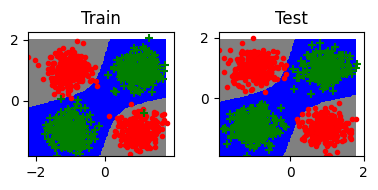

Run 3/5


100%|██████████| 500/500 [00:03<00:00, 160.83it/s]


Final loss: 5.376831712713985
Train accuracy : 0.998
Test accuracy : 1.0


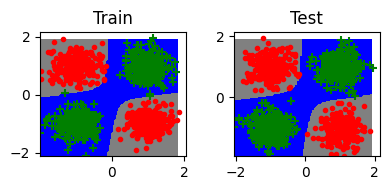

Run 4/5


100%|██████████| 500/500 [00:03<00:00, 164.43it/s]


Final loss: 4.884850680412859
Train accuracy : 1.0
Test accuracy : 1.0


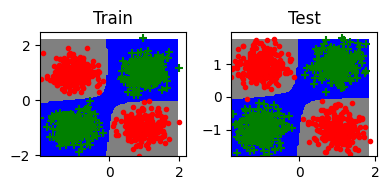

Run 5/5


100%|██████████| 500/500 [00:03<00:00, 155.80it/s]


Final loss: 5.462980476817773
Train accuracy : 0.997
Test accuracy : 1.0


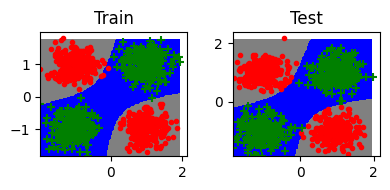

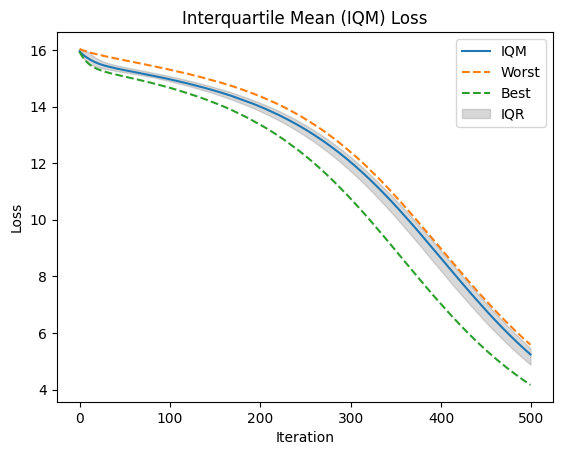

In [12]:
train_binary_classification_seq_multiple_runs("xavier_uniform")

On remarque que l'initialisation random n'arrive pas du tout à séparer les données. L'initialisation random normale y arrive mais pas tout le temps tandis que l'initialisation He normale y arrive et converge vite. L'initialisation Xavier normale converge mais plus lentement.
Les distributions uniformes sont plus précises dans la séparation mais prennent également plus de temps à converger que leur équivalente normale. L'initialisation He uniforme reste plus rapide que Xavier uniforme.